In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('prep.csv', sep=';')
df

,Retail_space_sq._m.,Rating_in_Google,Average_check,Average_income_of_the_population_UAH,The_average_population,Fast_food,Takeaway_coffee,Pizzeria,Main_street,Intra-quarter_road,Success
0,9.00,3.0,76.85,13884.0,3807.0,1.0,1.0,0.0,1.0,0.0,1
1,22.00,4.1,84.86,11700.0,9086.0,0.0,0.0,0.0,1.0,0.0,1
2,13.00,3.0,112.02,6786.0,6383.0,0.0,0.0,0.0,1.0,0.0,1
3,18.00,3.0,119.80,12948.0,4.0,1.0,1.0,1.0,1.0,0.0,1
4,25.00,4.0,94.88,11427.0,426.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
64,40.78,4.0,107.37,9399.0,12018.0,0.0,0.0,0.0,1.0,1.0,0
65,21.50,2.3,89.13,14079.0,10121.0,0.0,0.0,0.0,0.0,0.0,0
66,100.00,3.0,105.62,11427.0,7221.0,0.0,0.0,0.0,1.0,0.0,1
67,34.80,4.3,150.00,13338.0,3137.0,0.0,0.0,0.0,0.0,0.0,1


In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler().fit(df)
df = sc.transform(df)
dfs = pd.DataFrame(df, columns = ['Retail_space_sq._m.','Rating_in_Google','Average_check','Average_income_of_the_population_UAH','The_average_population','Fast_food','Takeaway_coffee','Pizzeria','Main_street','Intra-quarter_road','Success']).round()

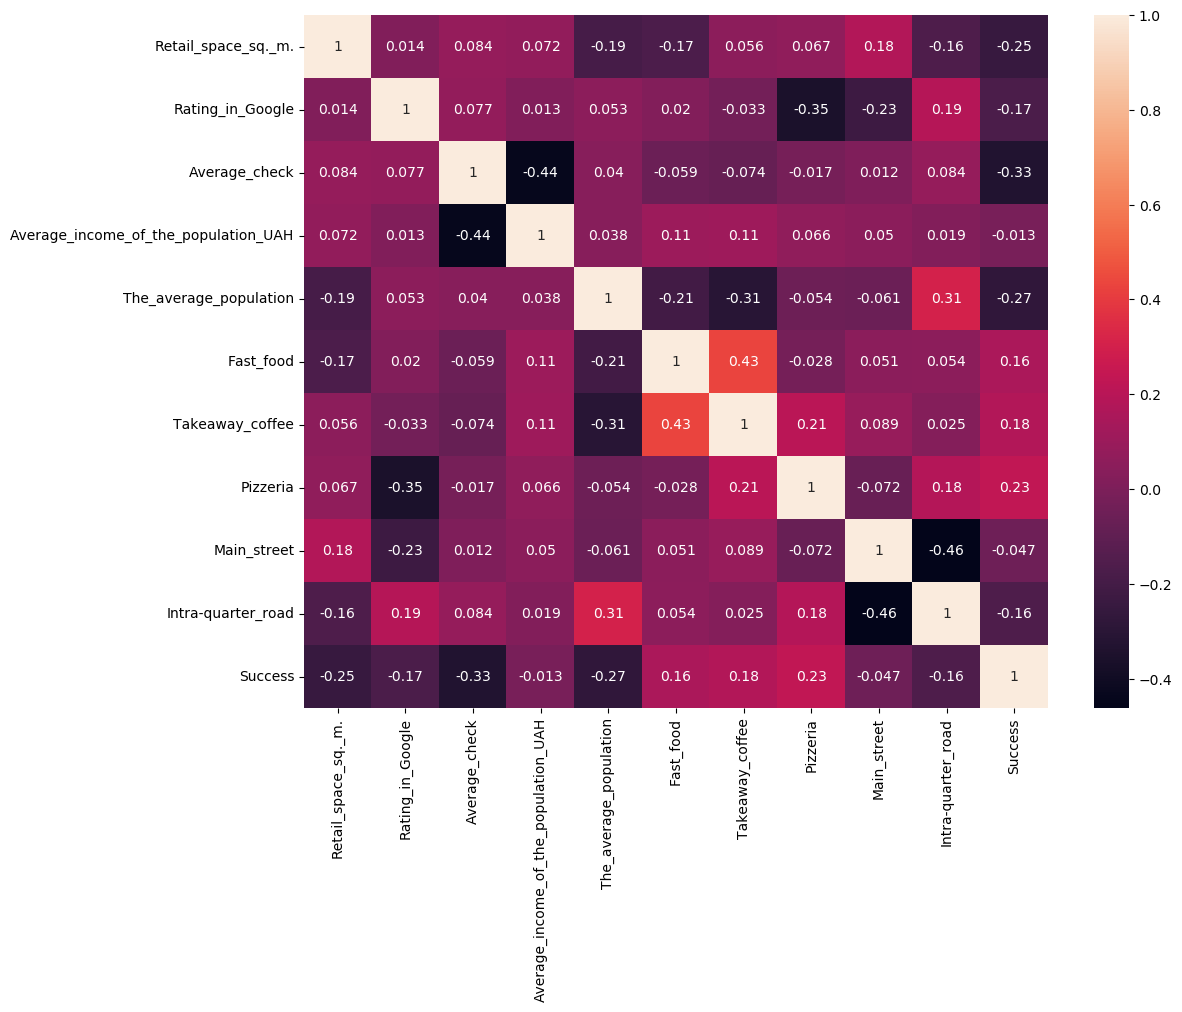

In [4]:
import seaborn as sns
corrmat = dfs.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True)
plt.show()

### Hierarchical Clustering

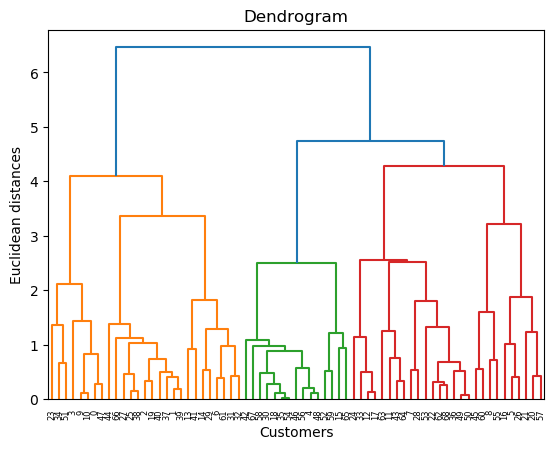

In [5]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(df, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

Относительно результатов дендрограммы, наиболее оптимальное количесво кластеров - 3. Также можно попробовать выделить 2-а кластера.

In [6]:
from sklearn.cluster import AgglomerativeClustering
hc_all2 = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward').fit_predict(df)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method

In [7]:
hc_all3 = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward').fit_predict(df)

In [8]:
X = df[:, [0,2,7]]

Теперь проведем кластеризацию на значимых параметрах.

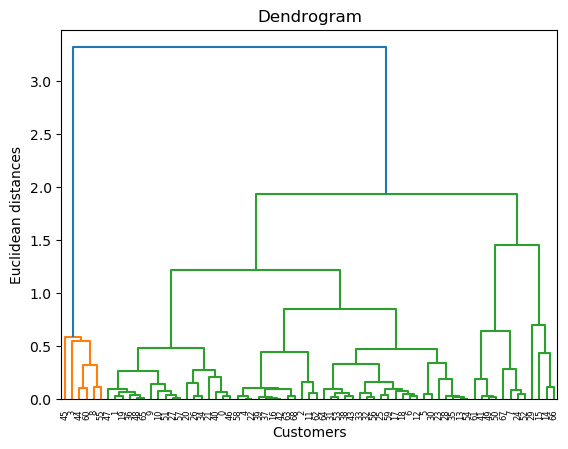

In [9]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

Тут также видим возможность выделения 2-х и 3-х кластеров.

In [10]:
from sklearn.cluster import AgglomerativeClustering
hc_2 = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward').fit_predict(df)
hc_3 = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward').fit_predict(df)

### K-Means Clustering

In [11]:
#from sklearn.cluster import KMeans
#wcss = []
#for i in range(1, 11):
#    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
#    kmeans.fit(df)
#    wcss.append(kmeans.inertia_)
#
#plt.plot(range(1, 11), wcss)
#plt.title('The Elbow Method')
#plt.xlabel('Number of clusters')
#plt.ylabel('WCSS')
#plt.show()

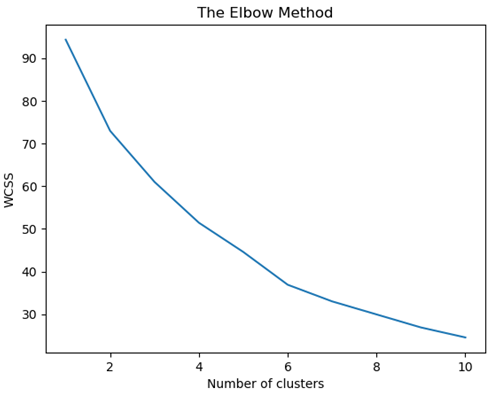

По методу локтя предполагаемое оптимальное количество кластеров - 6. Посмотрим на результаты силуэтов.

In [12]:
#from sklearn.metrics import silhouette_score
#
#sil = []
#
#for k in range(2, 8):
#  kmeans = KMeans(n_clusters = k).fit(df)  
#  preds = kmeans.fit_predict(df)
#  sil.append(silhouette_score(df, preds, metric = 'euclidean'))
#plt.plot(range(2, 8), sil)
#plt.title('Silhouette Method')
#plt.xlabel('Number of clusters')
#plt.ylabel('Sil')
#plt.show()
#
#for i in range(len(sil)):
# print(str(i+2) +":"+ str(sil[i]))

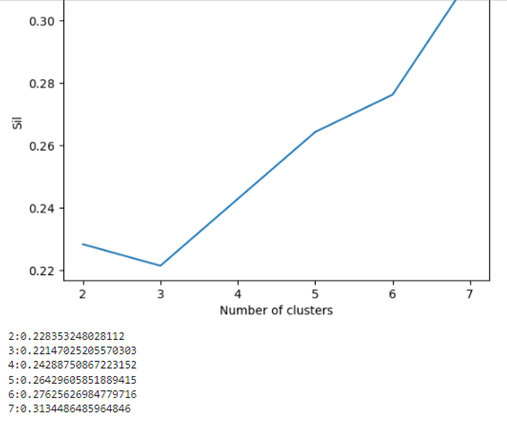

Для кластеризации структура недостаточно четкая. Поэтому данные силуэтов не такие достоверные для определения оптимального количества кластеров. Было принято решение выделить 2 и 3 кластера,чтоб потом сравнить показатели моделей. 

In [13]:
#km_all2 = KMeans(n_clusters = 2, init = 'k-means++', random_state = 0).fit_predict(df)
#kms = KMeans(n_clusters = 2, random_state = 0).fit(df)
#pd.DataFrame(kms.cluster_centers_, columns = ['Retail_space_sq._m.','Rating_in_Google','Average_check','Average_income_of_the_population_UAH','The_average_population','Fast_food','Takeaway_coffee','Pizzeria','Main_street','Intra-quarter_road','Success']).round(2)

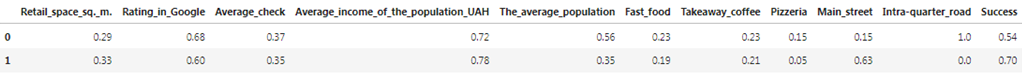

По результатам двух кластеров вариативными можно назвать переменные Success, The_average_population, Main_street,Intra-quarter_road.

In [14]:
#km_all3 = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0).fit_predict(df)
#kms = KMeans(n_clusters = 3, random_state = 0).fit(df)
#pd.DataFrame(kms.cluster_centers_, columns = ['Retail_space_sq._m.','Rating_in_Google','Average_check','Average_income_of_the_population_UAH','The_average_population','Fast_food','Takeaway_coffee','Pizzeria','Main_street','Intra-quarter_road','Success']).round(2)

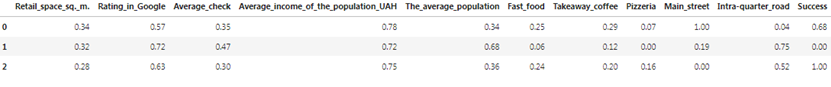

Сложно дать какую-то интерпретацию даным кластерам.

Теперь построим кластера только со значимыми переменными.

In [15]:
#km_2 = KMeans(n_clusters = 2, init = 'k-means++', random_state = 0).fit_predict(X)
#kms = KMeans(n_clusters = 2, random_state = 0).fit(X)
#pd.DataFrame(kms.cluster_centers_, columns = ['Retail_space_sq._m.','Average_check','Pizzeria']).round()

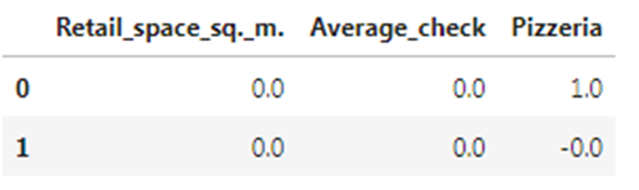

Сложно дать интерпретацию этим кластерам.

In [16]:
#km_3 = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0).fit_predict(X)
#kms = KMeans(n_clusters = 3, random_state = 0).fit(X)
#pd.DataFrame(kms.cluster_centers_, columns = ['Retail_space_sq._m.','Average_check','Pizzeria']).round()

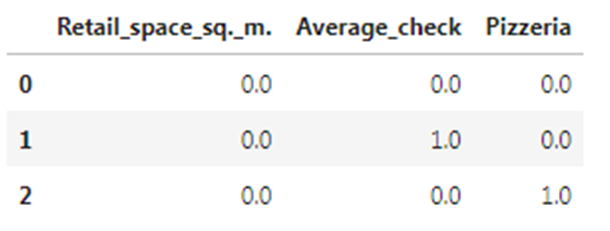

По этим данным можно предположить, что более высокий чек соответсвует торговой точке без наличия Пиццерии.

In [17]:
#from sklearn.metrics.cluster import adjusted_rand_score
#adjusted_rand_score(hc_all2,km_all2)

In [18]:
#from sklearn.metrics.cluster import adjusted_rand_score
#adjusted_rand_score(hc_all3,km_all3)

In [19]:
#from sklearn.metrics.cluster import adjusted_rand_score
#adjusted_rand_score(hc_2,km_2)

In [20]:
#from sklearn.metrics.cluster import adjusted_rand_score
#adjusted_rand_score(hc_3,km_3)

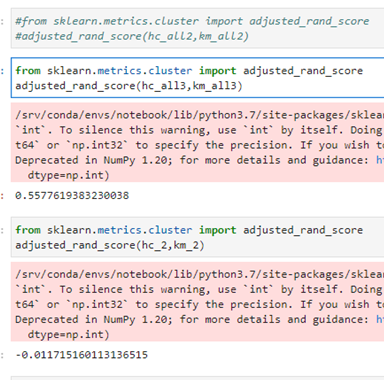

Лучше всего сопоставляются модели на основе 3-х кластеров всех показателей. На основе всех показателей с 2-я кластерами 23% сходимости. 

In [21]:
#Y = df[:, [4,8,9,10]]

In [22]:
#km_var = KMeans(n_clusters = 2, init = 'k-means++', random_state = 0).fit_predict(Y)
#kms = KMeans(n_clusters = 2, random_state = 0).fit(Y)
#pd.DataFrame(kms.cluster_centers_, columns = ['The_average_population','Main_street','Intra-quarter_road','Success'])

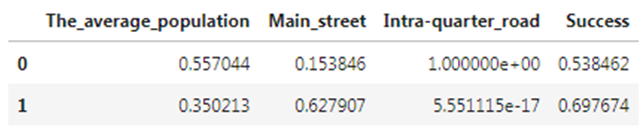

Постоив кластеризацию на основе вариативных данных, видим, что заведения с бОльшим уровнем успешности находятся на основных улицах, а не на квартальных. Также это те заведения, которые находятся в городах с меньшим населением людей.

In [23]:
#import pickle
#obj = {'hc_all2': hc_all2,'hc_all3': hc_all3, 'hc_2': hc_2,'hc_3': hc_3,'km_all2':km_all2, 'km_all3':km_all3,'km_2':km_2, 'km_3':km_3,'km_var':km_var}
#output = open('clust.pkl', 'wb')
#pickle.dump(obj, output, 2)
#output.close()